In [1]:
## Preliminaries

path_root = '/home/oab18/Projects/'
path_data = '/home/oab18/Desktop/intermediates_reg_128sq/'

device = 'cuda'

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset


In [3]:
torch.manual_seed(132)
torch.autograd.set_detect_anomaly(True)                     

In [4]:
## Dataset

class RSNA_2D(Dataset):
    def __init__(self, path_data, device='cuda', **kwargs):
        self.device = device
        self.v_max = kwargs.pop('v_max', 2000)  # Slightly above highest HU value for cortical bone
        self.v_min = kwargs.pop('v_min', -150)  # Slightly below lowest HU value for fat
        
        filetype = ".npy"
        self.path_dir_list = []
        self.path_file_list = []

        for dirpath, dirnames, filenames in os.walk(path_data):  # else walk the dcm directory and get the paths
            if len(filenames) > 0:
                self.path_dir_list.append(dirpath)
                self.path_file_list = [dirpath+'/'+f for f in filenames if f.endswith(filetype)]

        
    def __len__(self):
        return len(self.path_file_list)
        
    def __getitem__(self, idx):
        img = torch.tensor(np.load(self.path_file_list[idx]))
        img[img < self.v_min] = self.v_min
        img[img > self.v_max] = self.v_max
        return img.unsqueeze(0) #.to(self.device)

rsna = RSNA_2D(path_data)

from time import time
t0 = time()
rsna.__getitem__(0)
t1 = time()

print('Image load time: '+str(t1-t0))

print(rsna.path_dir_list)
print(rsna.__len__())


Image load time: 0.015422821044921875
['/home/oab18/Desktop/intermediates_reg_128sq/']
19958


Text(0.5, 1.0, 'ID: 18322')

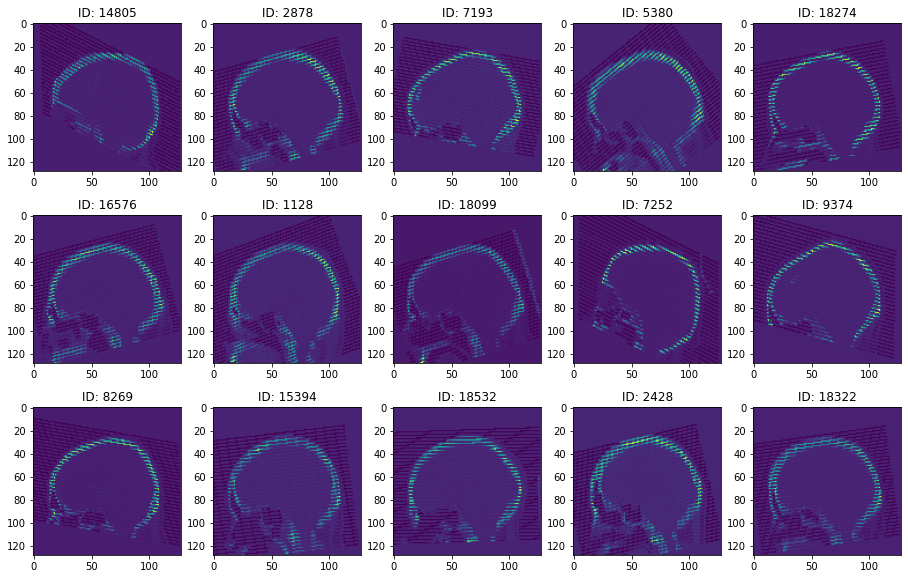

In [5]:
## Checks

item_list = torch.randint(0, rsna.__len__(), (18,))

fig, ax = plt.subplots(3,5, figsize=[12.5, 8], constrained_layout=True)
ax[0,0].imshow(rsna.__getitem__(item_list[0]).cpu().squeeze())
ax[1,0].imshow(rsna.__getitem__(item_list[1]).cpu().squeeze())
ax[2,0].imshow(rsna.__getitem__(item_list[2]).cpu().squeeze())
ax[0,1].imshow(rsna.__getitem__(item_list[3]).cpu().squeeze())
ax[1,1].imshow(rsna.__getitem__(item_list[4]).cpu().squeeze())
ax[2,1].imshow(rsna.__getitem__(item_list[5]).cpu().squeeze())
ax[0,2].imshow(rsna.__getitem__(item_list[6]).cpu().squeeze())
ax[1,2].imshow(rsna.__getitem__(item_list[7]).cpu().squeeze())
ax[2,2].imshow(rsna.__getitem__(item_list[8]).cpu().squeeze())
ax[0,3].imshow(rsna.__getitem__(item_list[9]).cpu().squeeze())
ax[1,3].imshow(rsna.__getitem__(item_list[10]).cpu().squeeze())
ax[2,3].imshow(rsna.__getitem__(item_list[11]).cpu().squeeze())
ax[0,4].imshow(rsna.__getitem__(item_list[12]).cpu().squeeze())
ax[1,4].imshow(rsna.__getitem__(item_list[13]).cpu().squeeze())
ax[2,4].imshow(rsna.__getitem__(item_list[14]).cpu().squeeze())
ax[0,0].set_title('ID: '+str(int(item_list[0])))
ax[1,0].set_title('ID: '+str(int(item_list[1])))
ax[2,0].set_title('ID: '+str(int(item_list[2])))
ax[0,1].set_title('ID: '+str(int(item_list[3])))
ax[1,1].set_title('ID: '+str(int(item_list[4])))
ax[2,1].set_title('ID: '+str(int(item_list[5])))
ax[0,2].set_title('ID: '+str(int(item_list[6])))
ax[1,2].set_title('ID: '+str(int(item_list[7])))
ax[2,2].set_title('ID: '+str(int(item_list[8])))
ax[0,3].set_title('ID: '+str(int(item_list[9])))
ax[1,3].set_title('ID: '+str(int(item_list[10])))
ax[2,3].set_title('ID: '+str(int(item_list[11])))
ax[0,4].set_title('ID: '+str(int(item_list[12])))
ax[1,4].set_title('ID: '+str(int(item_list[13])))
ax[2,4].set_title('ID: '+str(int(item_list[14])))

monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.
`len(strides) > len(channels) - 1`, the last 1 values of strides will not be used.


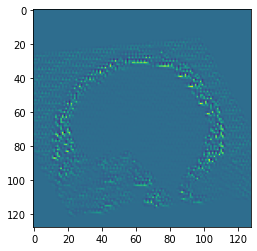

In [6]:
from monai.networks.nets import UNet
from torchsummary import summary

#            dimensions: number of spatial dimensions.
#            in_channels: number of input channels.
#            out_channels: number of output channels.
#            channels: sequence of channels. Top block first.
#            strides: convolution stride.
#            kernel_size: convolution kernel size. Defaults to 3.
#            up_kernel_size: upsampling convolution kernel size. Defaults to 3.
#            num_res_units: number of residual units. Defaults to 0.
#            act: activation type and arguments. Defaults to PReLU.
#            norm: feature normalization type and arguments. Defaults to instance norm.
#            dropout: dropout ratio. Defaults to no dropout.

def make_model(ch=1, device='cuda'):
    channel_schedule = (16, 32, 64)
    strides = tuple([2 for i in range(len(channel_schedule))])
    model =  UNet(
        dimensions=2,
        in_channels=ch,
        out_channels=ch,
        channels=channel_schedule,
        strides=strides, 
        num_res_units=3,
        act="mish",
        dropout=0)
    return model #.to(device)

model = make_model()

# summary(model, (1,320,320))

plt.imshow(model(rsna.__getitem__(0).unsqueeze(0)).detach().cpu().squeeze())




epoch: 0 started


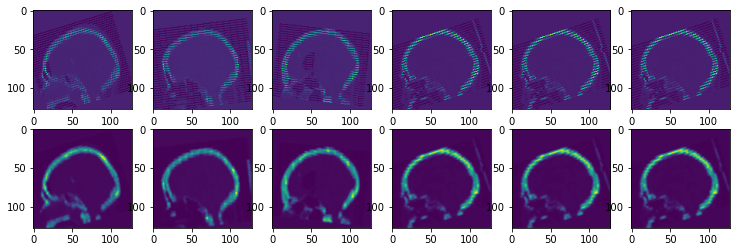

epoch: 1 started


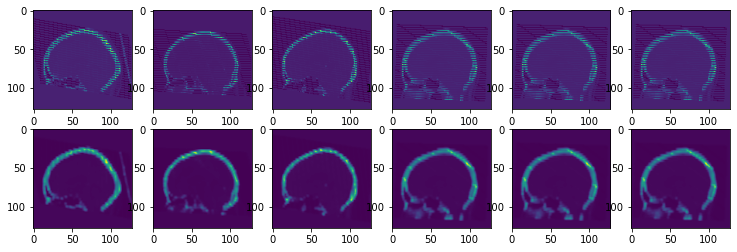

epoch: 2 started


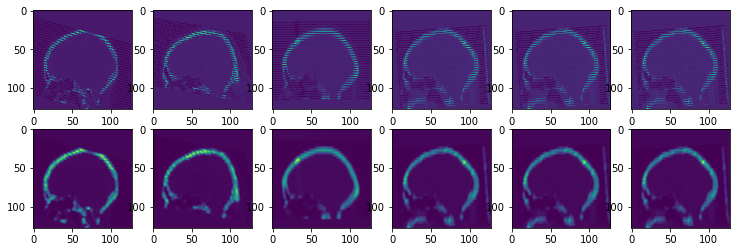

epoch: 3 started


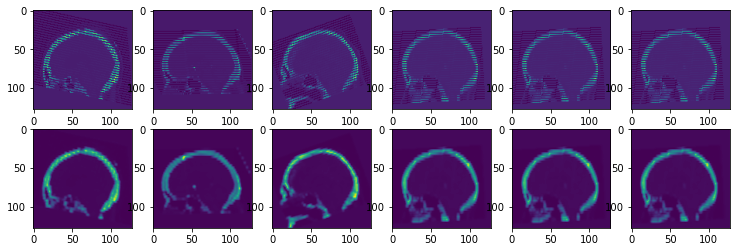

epoch: 4 started


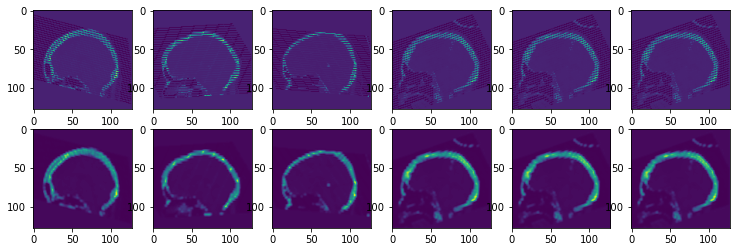

epoch: 5 started


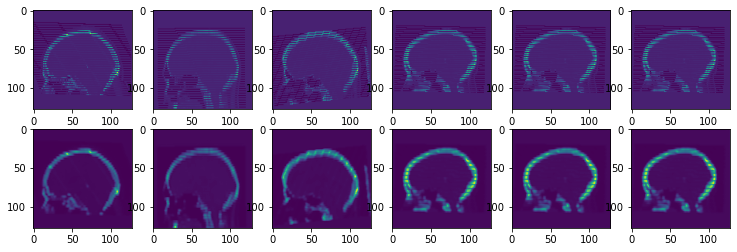

epoch: 6 started


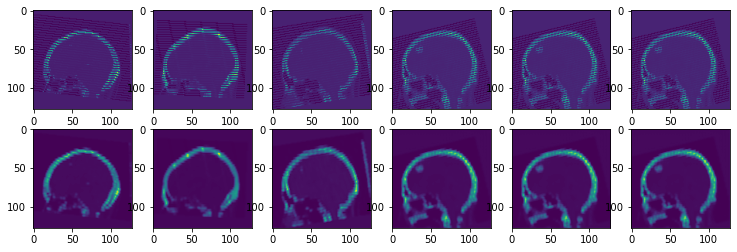

epoch: 7 started


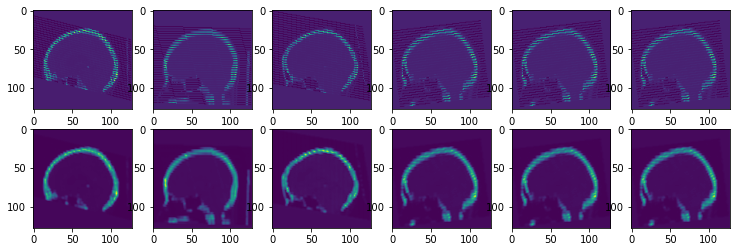

epoch: 8 started


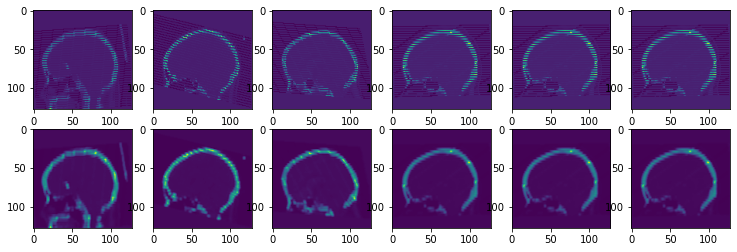

epoch: 9 started


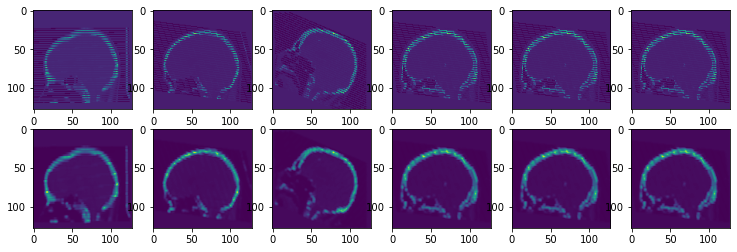

epoch: 10 started


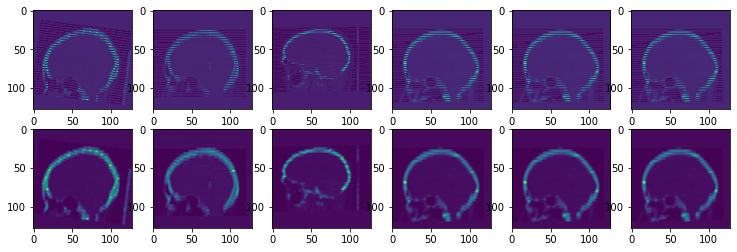

epoch: 11 started


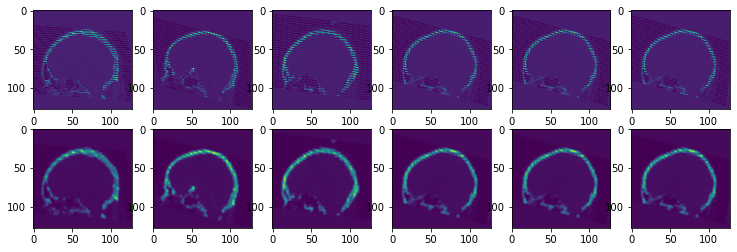

epoch: 12 started


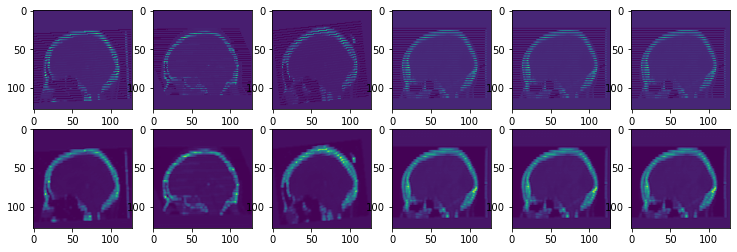

epoch: 13 started


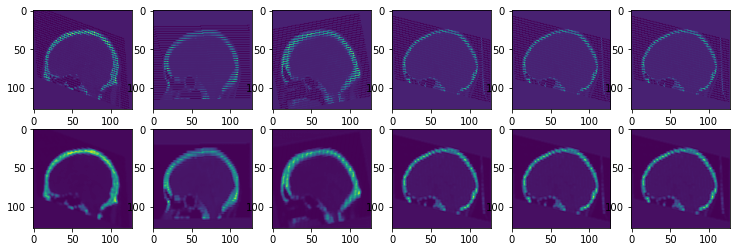

epoch: 14 started


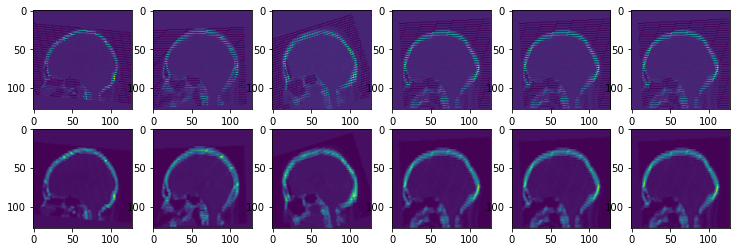

epoch: 15 started


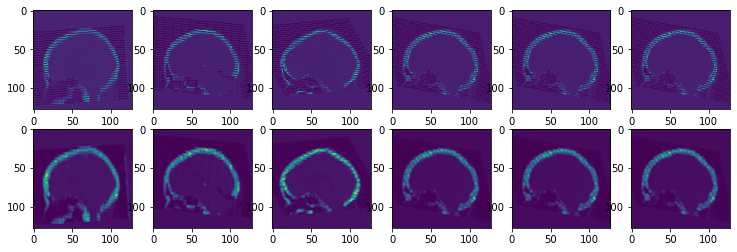

epoch: 16 started


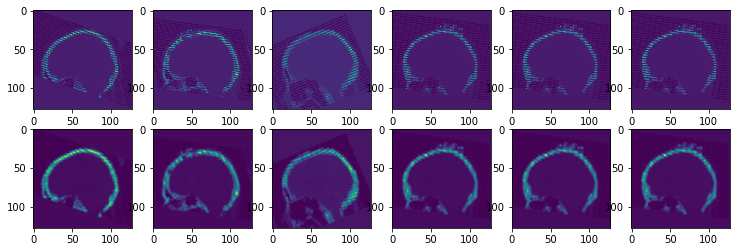

epoch: 17 started


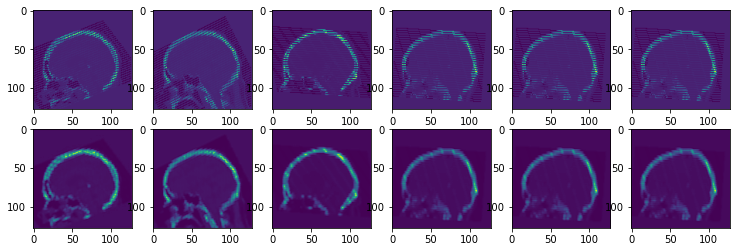

epoch: 18 started


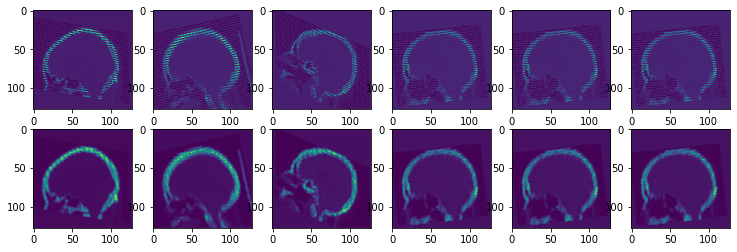

epoch: 19 started


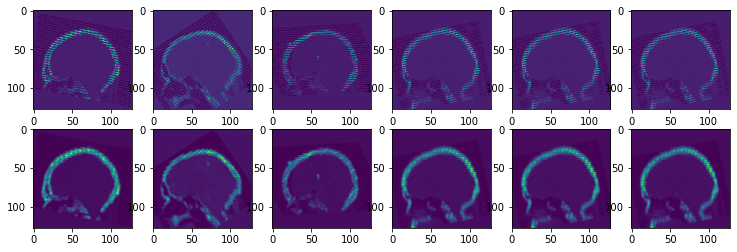

epoch: 20 started


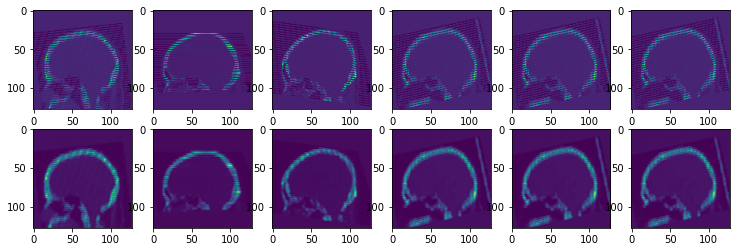

epoch: 21 started


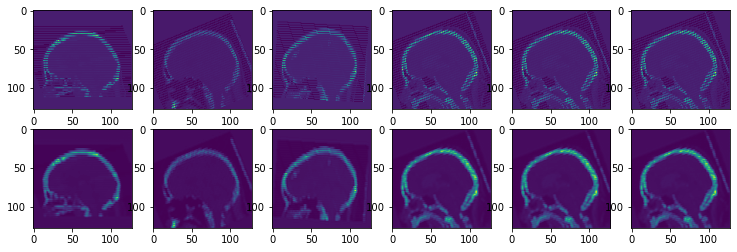

epoch: 22 started


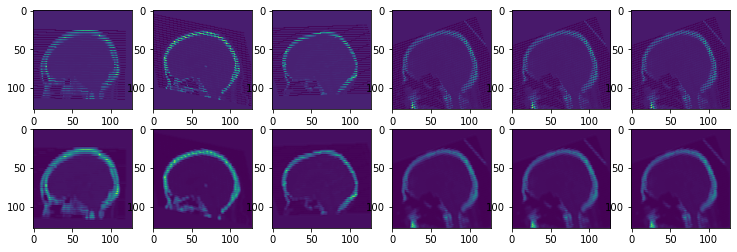

epoch: 23 started


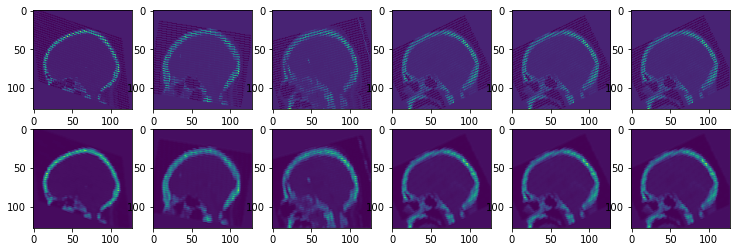

epoch: 24 started


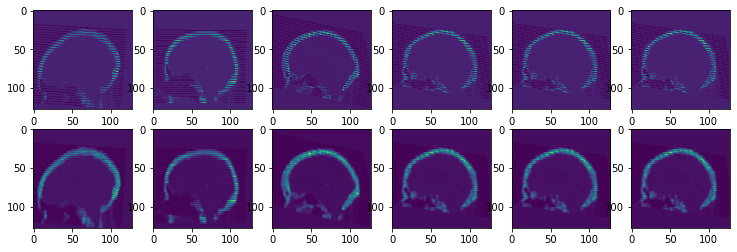

epoch: 25 started


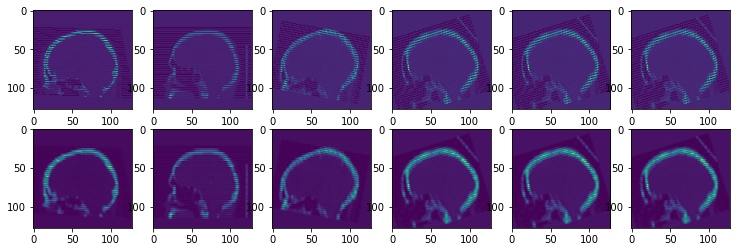

epoch: 26 started


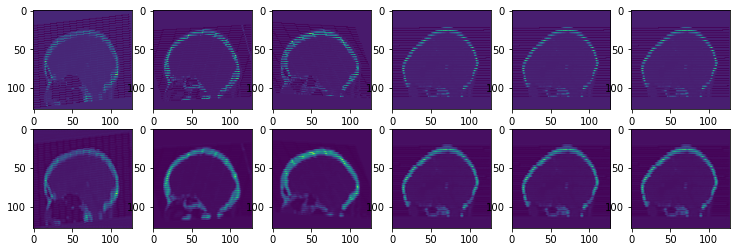

epoch: 27 started


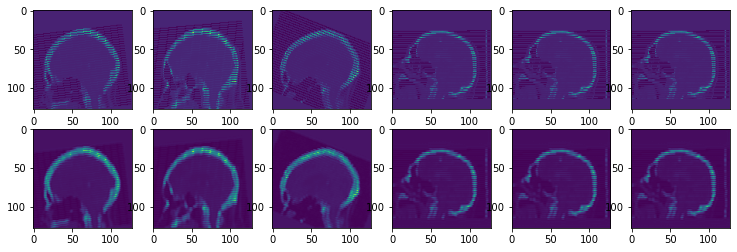

epoch: 28 started


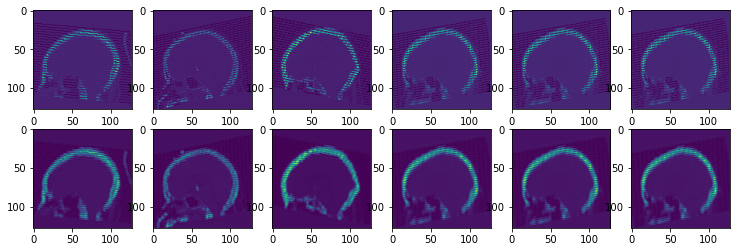

epoch: 29 started


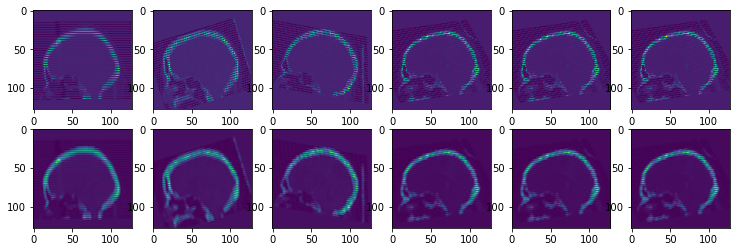

epoch: 30 started


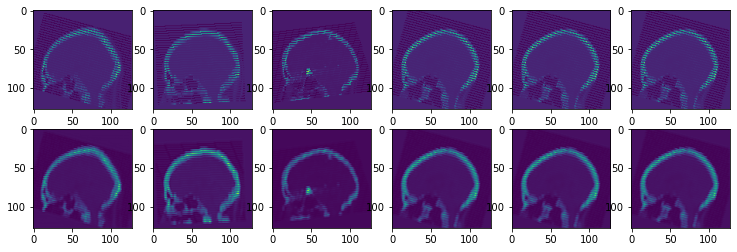

epoch: 31 started


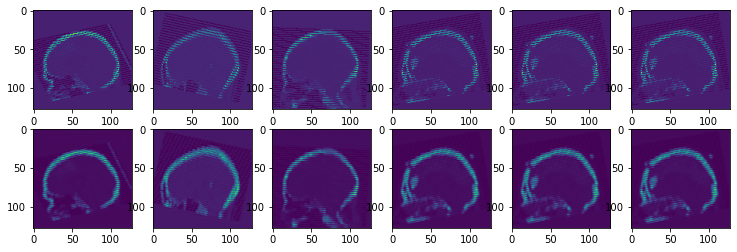

epoch: 32 started


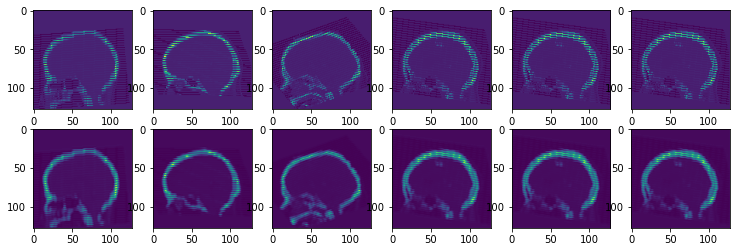

epoch: 33 started


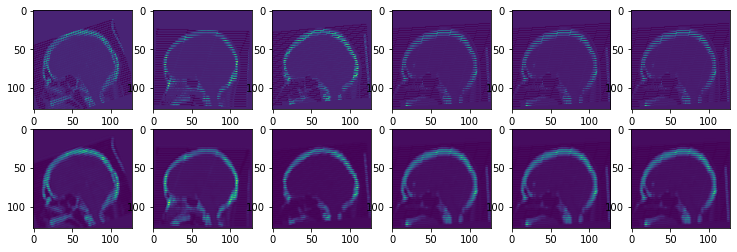

epoch: 34 started


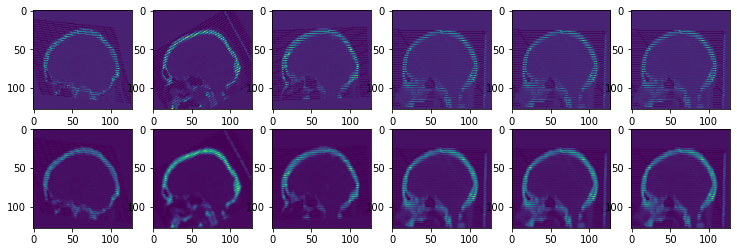

epoch: 35 started


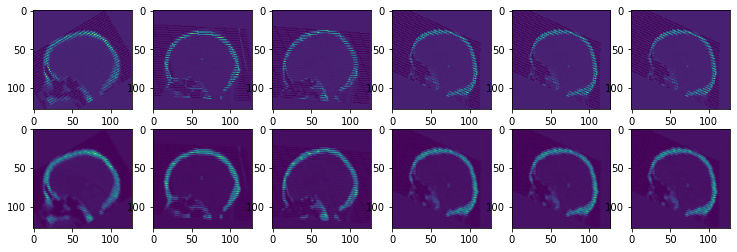

epoch: 36 started


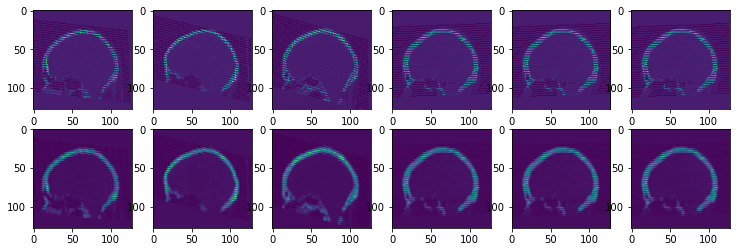

epoch: 37 started


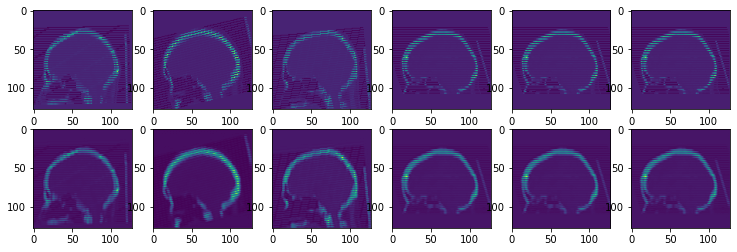

KeyboardInterrupt: 

In [40]:
from tqdm import tqdm
from itertools import count
from torch.utils.tensorboard import SummaryWriter
from torchvision import utils

## ToDo List
# back-prop loss from only regions with data
# normalise the output images and recon ouput layer
# re-register RSNA data including other tissue types in the TPM file; how many images are poorly aligned?
# measure L2-loss of each image relative to the dataset average, exclude outliers from training.

def train(model, dataloader, optimiser, loss_fun):
    loss_accumulate = 0
    loss_list = []
    m = 0
    
    vol = next(iter(dataloader))
    vol = vol.to(device)
    recon = model.forward(vol)

    # plot_path = '/home/oab18/Desktop/imputation_plots/'
    # writer = SummaryWriter(plot_path+'log')

    for epoch in range(200):
        print('epoch: '+str(epoch)+' started')
        fig, ax = plt.subplots(2, 6, figsize=[12.5, 4])
        ax[0, 0].imshow(vol.detach().cpu()[0].squeeze())
        ax[0, 1].imshow(vol.detach().cpu()[1].squeeze())
        ax[0, 2].imshow(vol.detach().cpu()[2].squeeze())
        ax[0, 3].imshow(vol.detach().cpu()[3].squeeze())
        ax[0, 4].imshow(vol.detach().cpu()[4].squeeze())
        ax[0, 5].imshow(vol.detach().cpu()[5].squeeze())
        ax[1, 0].imshow(recon.detach().cpu()[0].squeeze())
        ax[1, 1].imshow(recon.detach().cpu()[1].squeeze())
        ax[1, 2].imshow(recon.detach().cpu()[2].squeeze())
        ax[1, 3].imshow(recon.detach().cpu()[3].squeeze())
        ax[1, 4].imshow(recon.detach().cpu()[4].squeeze())
        ax[1, 5].imshow(recon.detach().cpu()[5].squeeze())
        plt.show()

        for vol, n in zip(dataloader, count(0)):
            optimiser.zero_grad()
            vol = vol.to(device)
            recon = model.forward(vol)
            loss = loss_fun(recon, vol) #+ sum_non_bias_l2_norms(model.parameters(), 10e-4)

            ## Loss
            loss_accumulate += float(loss.detach().clone())  # Store for later
            loss.backward()
            optimiser.step()

            m += 1
            ## Write total loss
            # loss_list.append(loss_accumulate)
            # loss_accumulate = 0
            # writer.add_scalar('training loss', loss.detach(), m)
            # img_grid = utils.make_grid(vol)
            # recon_grid = utils.make_grid(recon)
            # writer.add_image('img_grid'+str(epoch), img_grid)
            # writer.add_image('recon_grid'+str(epoch), recon_grid)
            


# Set training static parameters and hyperparameters
n_epochs = 300                        
learning_rate = 1e-2
batch_size = 32                                        

# Dataloader
dataloader = DataLoader(rsna,
                        batch_size=batch_size,
                        shuffle=True)#,
                        #num_workers=4)

print()
optimiser = torch.optim.Adam(model.parameters())
loss_fun = nn.MSELoss()
model = model.to(device)
train(model, dataloader, optimiser, loss_fun)


